In [1]:
#from comet_ml import Experiment

import os
from PIL import Image, ImageEnhance, ImageFilter
import fnmatch
import numpy                  as np
import pandas                 as pd
import matplotlib.pyplot      as plt
import matplotlib.image       as mpimg
from getpass          import getpass
import scipy.io as sio
from scipy.ndimage import sobel


import warnings
warnings.simplefilter('ignore')

In [2]:
# function to open image & make sure it's in RGB format

def open_image(path):
    try:
        # Open the image and convert to RGB if it's not already
        img = Image.open(path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        return img
    except IOError: 
        print("Error: Unable to loas image")
        sys.exit(1)

In [4]:
# Function to display images
def display_images(suptitle, images, titles, axis=False, rows=1, cols=1, gray=False, figwidth=20, fighight=10):
    
    size = len(images)
    
    # Check that the number of images and titles match
    assert size == len(titles)
    
    # Check if axis is disabled or enabled
    if axis:
        axis = 'on'
    else:
        axis = 'off'
        
    # Ensure rows and cols are greater than 0
        rows = max(1, rows)
        cols = max(1, cols)
    
    if (gray == False):
        
        if (size == 1):
            plt.figure(figsize=(figwidth, fighight))
            plt.imshow(images[0])
            plt.axis(axis)
            plt.title(titles[0])
            plt.show()
        else:
            # Create a figure and a grid of subplots with the specified number of rows and columns
            fig, axes = plt.subplots(rows, cols, figsize=(figwidth, fighight))
            
            # check if the number of images is equal to the number of rows and columns
            assert size == (rows * cols)
            
            # Loop over the images and titles and create a subplot for each one
            for i, ax in enumerate(axes.flatten()):
                ax.imshow(images[i])
                ax.set_title(titles[i])
                ax.axis(axis)

            fig.suptitle(suptitle)
            # tight_layout() adjusts the subplots to fit into the figure area.
            fig.tight_layout() 
            plt.show()
    else :    
        
        if (size == 1):
            plt.figure(figsize=(figwidth, fighight))
            plt.imshow(images[0], cmap='gray')
            plt.axis(axis)
            plt.title(titles[0])
            plt.show()
            
        else:
            
            # Create a figure and a grid of subplots with the specified number of rows and columns
            fig, axes = plt.subplots(rows, cols, figsize=(figwidth, fighight))
            
            # check if the number of images is equal to the number of rows and columns
            assert size == (rows * cols)
            
            # Loop over the images and titles and create a subplot for each one
            for i, ax in enumerate(axes.flatten()):
                ax.imshow(images[i], cmap='gray')
                ax.set_title(titles[i])
                ax.axis(axis)
                
            fig.suptitle(suptitle)
            # tight_layout() adjusts the subplots to fit into the figure area.
            fig.tight_layout()
            plt.show()

In [5]:
paths = []
images = []
labels = []

main_data_path = "Data"

In [6]:

# Load the training labels
train_labels_path = os.path.join(main_data_path, "train_labels.csv")
train_labels = pd.read_csv(train_labels_path)

print("Number of labels in the training set: ", len(train_labels))
train_labels.head()

Number of labels in the training set:  2200


,path,label
0,front_or_left-1,0
1,front_or_left-22,0
2,front_or_left-64,0
3,front_or_left-85,0
4,front_or_left-106,0


In [7]:
# Load the training 
train_dir = os.path.join(main_data_path + "/Train")
train_images_dir = os.listdir(train_dir)

for i, img in enumerate(train_images_dir):
    image = open_image(os.path.join(train_dir, img))
    label_row = train_labels.loc[train_labels['path'] == img.split(".")[0]] 
    label = label_row['label'].values[0] if not label_row.empty else None
    paths.append(img.split(".")[0])
    labels.append(label)
    images.append(image) 

train_size = len(images)
print(f"Train set size: {train_size}")


Train set size: 2200


In [8]:
# check if there is none values in the labels 

none_values = [label for label in labels if label is None]
print(f"Number of None values in the labels: {len(none_values)}")

Number of None values in the labels: 0


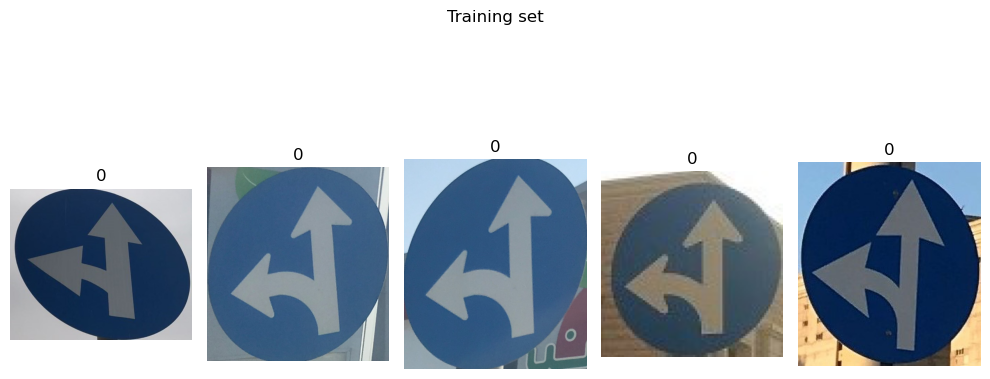

In [21]:
# check the number of images and labels
assert len(paths) == len(labels) == len(images)

# Display the first 5 images
display_images("Training set", images[:5], labels[:5], rows=1, cols=5, figwidth=10, fighight=5)

In [9]:
# Load the test labels
test_labels_path = os.path.join(main_data_path, "test_labels.csv")
test_labels = pd.read_csv(test_labels_path)

print("Number of labels in the test set: ", len(test_labels))
test_labels.head()

Number of labels in the test set:  518


,path,label
0,front_or_left-43,0
1,front_or_left-337,0
2,front_or_left-400,0
3,front_or_left-442,0
4,front_or_left-463,0


In [10]:
# Load the test images   
test_dir = os.path.join(main_data_path + "/Test")
test_images_dir = os.listdir(test_dir)

for i, img in enumerate(test_images_dir):
    image = open_image(os.path.join(test_dir, img))
    label_row = test_labels.loc[test_labels['path'] == img.split(".")[0]] 
    label = label_row['label'].values[0] if not label_row.empty else None
    paths.append(img.split(".")[0])
    labels.append(label)
    images.append(image)

test_size = len(images) - train_size
print(f"Test set size: {test_size}")

Test set size: 518


In [11]:
# check if there is none values in the labels 

none_values = [label for label in labels if label is None]
print(f"Number of None values in the labels: {len(none_values)}")

Number of None values in the labels: 0


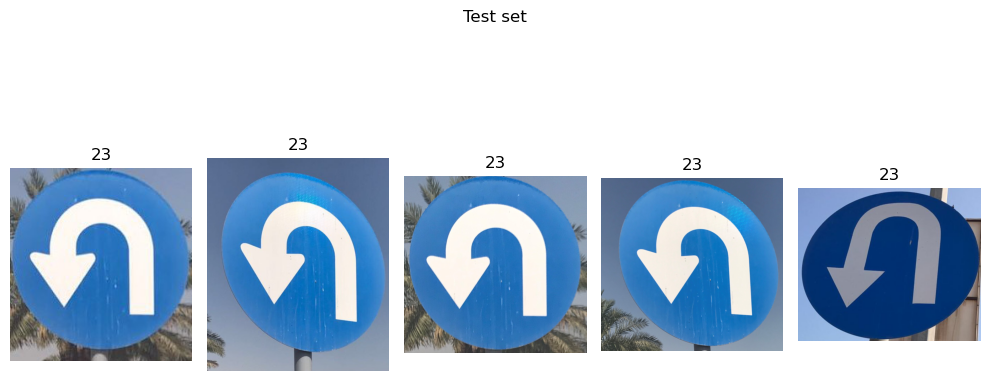

In [25]:
# check the number of images and labels
assert len(paths) == len(labels) == len(images)

# Display the first 5 images
display_images("Test set", images[-5:], labels[-5:], rows=1, cols=5, figwidth=10, fighight=5)

In [12]:
paths_df = pd.DataFrame(paths, columns=['path'])
labels_df = pd.DataFrame(labels, columns=['label'])
images_df = pd.DataFrame(images, columns=['image'])

Data = pd.concat([paths_df, images_df, labels_df], axis=1)

In [13]:
Data.head()

,path,image,label
0,front_or_left-1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,front_or_left-1009,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
2,front_or_left-1051,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
3,front_or_left-106,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
4,front_or_left-1072,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0


In [14]:
# print Data size
print(f"Data shape: {len(Data)}")

Data shape: 2718


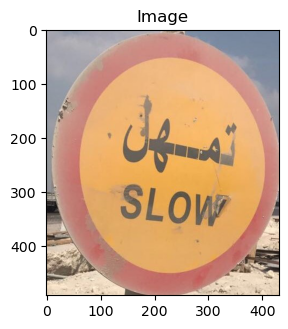

In [29]:
img = (Data['image'][1500]).copy()

display_images("Orignal Image", [img], ["Image"], axis=True, fighight=5, figwidth=3)

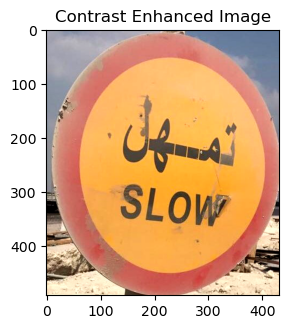

In [30]:
factor = 1.4
contrast = ImageEnhance.Contrast(img)
img1 = np.reshape(np.array(contrast.enhance(factor).getdata()).astype(np.uint8), (img.height, img.width, 3))

display_images("Contrast Enhanced Image", [img1], ["Contrast Enhanced Image"], axis=True, gray=False, fighight=5, figwidth=3)

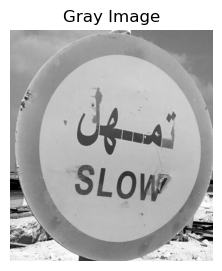

In [31]:
# convert numpy array to PIL image
img1 = Image.fromarray(img1)

gray_img = img1.convert('L')

# Display the grayscale image
display_images("Gray Image", [gray_img], ["Gray Image"], axis=False, gray=True, figwidth=5, fighight=3)

# save the grayscale image
#gray_img.save("gray_img.jpg")

Resized Image Size:  (150, 200)


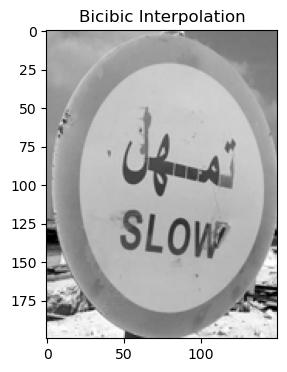

In [32]:
# Resize the grayscale image to 50x50 pixels
nl = 150
nc = 200

resized_imgBICUBIC = gray_img.resize((nl, nc), Image.BICUBIC)

'''resized_imgBILINEAR = gray_img.resize((nl, nc), Image.BILINEAR)
resized_imgNEAREST = gray_img.resize((nl, nc), Image.NEAREST)'''

# print the size of the resized image
print("Resized Image Size: ", resized_imgBICUBIC.size)

'''images = [resized_imgBICUBIC, resized_imgBILINEAR, resized_imgNEAREST]
titles = ["BICUBIC", "BILINEAR", "NEAREST"]'''

# BICUBIC is the best method for resizing images

display_images("Resized Image", [resized_imgBICUBIC], ["Bicibic Interpolation"], axis=True, gray=True, figwidth=8, fighight=4)
#display_images("Resized Image", images, titles, axis=True, gray=True, rows=1, cols=3, figwidth=8, fighight=4)


(150, 200)


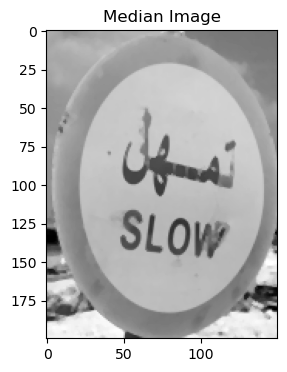

In [33]:

resized_img = resized_imgBICUBIC.copy()

ksize = 3
im_median = resized_img.filter(ImageFilter.MedianFilter(size=ksize))

#print image size
print(im_median.size)

# im_median.save("median_img.jpg")

# Display the grayscale image
display_images("Median Image", [im_median], ["Median Image"], axis=True, gray=True, figwidth=8, fighight=4)


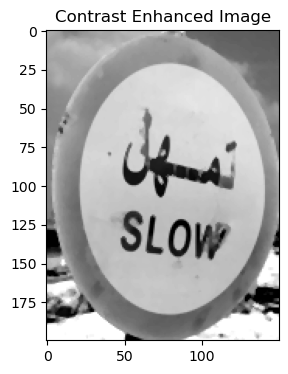

In [34]:
factor = 1.5
contrast = ImageEnhance.Contrast(im_median)
img2 = np.reshape(np.array(contrast.enhance(factor).getdata()).astype(np.uint8), (im_median.height, im_median.width))

display_images("Contrast Enhanced Image", [img2], ["Contrast Enhanced Image"], axis=True, gray=True, fighight=5, figwidth=3)

In [35]:
# Apply Bluring 

images = []
titles = []

ksize = [3,5]

img = resized_imgBICUBIC.copy()

images.insert(0,img)
titles.insert(0,'Original Image')

images.insert(3,img)
titles.insert(3,'Original Image')

for index, n in enumerate(ksize, start=1):
    # Create a box blur kernel
    # np.ones((w, x)) / (w * x) --> an array of shape (w, x) with all elements set to 1/(w*x)
    print ("kernal",n,"is processing","using PIL library")
    box_blur_kernel = np.ones((n, n)) / (n * n)
    # Apply the filter
    # img.filter(ImageFilter.Kernel(size=(w, x), kernel=y, scale=z)) --> apply a kernel filter to the image
    # flatten() --> returns a copy of the array collapsed into one dimension
    image_blurred = img.filter(ImageFilter.Kernel(size=(n, n), kernel=box_blur_kernel.flatten(), scale=1)) # 1 is the scale factor to normalize the kernel values

    
    images.insert(index,image_blurred)
    titles.insert(index,f'Blurred with kernel size {n}x{n}')
    
    # For finding equivalent σ to the kernel size n, σ = n - 1 / 6
    # it is an aproximate function to find the equivalent σ
    radius = (n - 1) / 6
    im1 = img.filter(ImageFilter.GaussianBlur(radius))
    images.insert(index+3,im1)
    titles.insert(index+3,f'GaussianBlur with Radius = {radius:.2f}')  
    
    imagesSize = len(images)
    titlesSize = len(titles)

print(f"Images size: {imagesSize}, titles size: {titlesSize}")

kernal 3 is processing using PIL library
kernal 5 is processing using PIL library
Images size: 6, titles size: 6


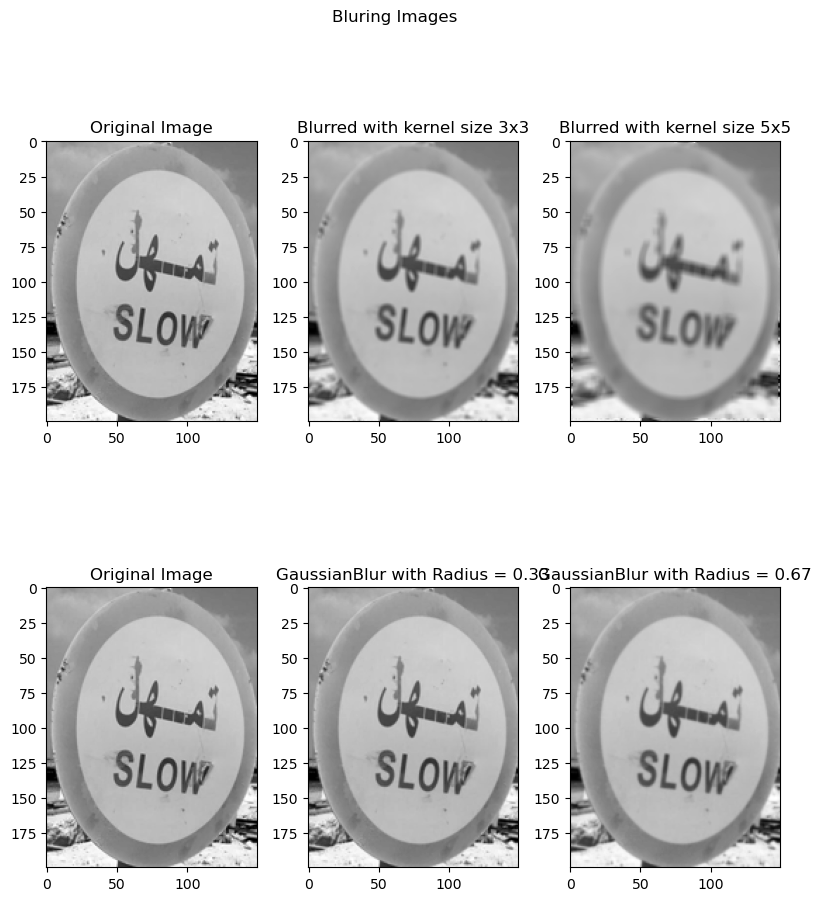

In [36]:
display_images("Bluring Images", images, titles, axis=True, gray=True, rows=2, cols=3, fighight=10, figwidth=8)

# image with Gaussian Bluring radias = 0.33 is the best

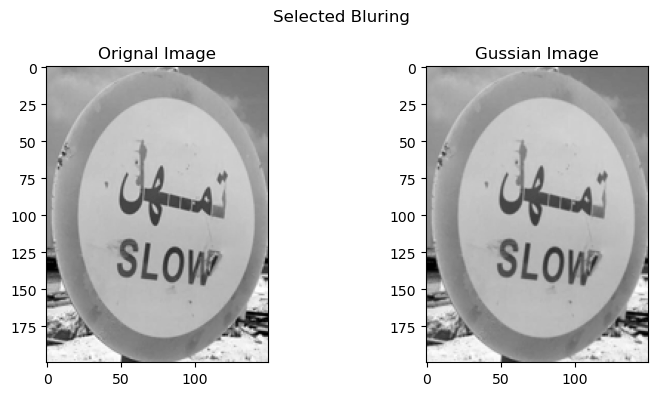

In [37]:
resized_img = resized_imgBICUBIC.copy()

radius = 0.33
GuassianBluring = resized_img.filter(ImageFilter.GaussianBlur(radius=radius))

# Display the grayscale image
display_images("Selected Bluring", [resized_img, GuassianBluring], ["Orignal Image", "Gussian Image"], rows= 1, cols=2, axis=True, gray=True, figwidth=8, fighight=4)

In [38]:
# convert resized_img image to np array

resized_img_array = np.array(resized_img)
Bluring_img_array = np.array(GuassianBluring)

print("Resized Image Shape: ", resized_img_array.shape)
print("Bluring Image Shape: ", Bluring_img_array.shape)

Resized Image Shape:  (200, 150)
Bluring Image Shape:  (200, 150)


In [39]:
# Detailed Image
Detailed_Image = resized_img_array - Bluring_img_array

print("Detailed Image Shape: ", Detailed_Image.shape)

Detailed Image Shape:  (200, 150)


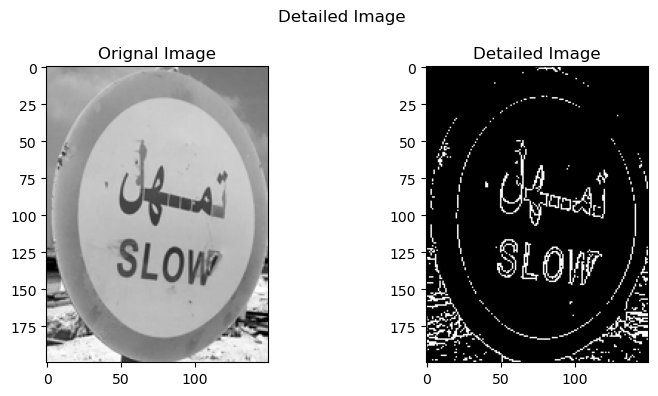

In [40]:
display_images("Detailed Image", [resized_img_array,Detailed_Image], ["Orignal Image", "Detailed Image"], rows=1, cols=2, axis=True, gray=True, figwidth=8, fighight=4)

In [41]:
# Sharpened Image
amount = 1.01
Sharper_img = resized_img_array + (amount * Detailed_Image)

print("Sharper Image Shape: ", Sharper_img.shape)

Sharper Image Shape:  (200, 150)


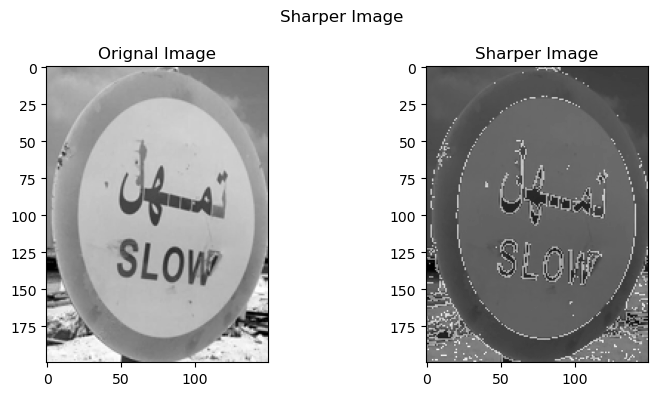

In [42]:
display_images("Sharper Image", [resized_img_array, Sharper_img], ["Orignal Image", "Sharper Image"], rows=1, cols=2, axis=True, gray=True, figwidth=8, fighight=4)

# shows that Unsharp Masking not show any improvement in the image 

In [43]:
import cv2 as cv
from cv2 import Laplacian

In [44]:
# Apply the Laplacian filter
laplacian_image = cv.Laplacian(resized_img_array, cv.CV_64F)


# print the shape of the resized image
print("Laplacian Image shape: ", laplacian_image.shape)


Laplacian Image shape:  (200, 150)


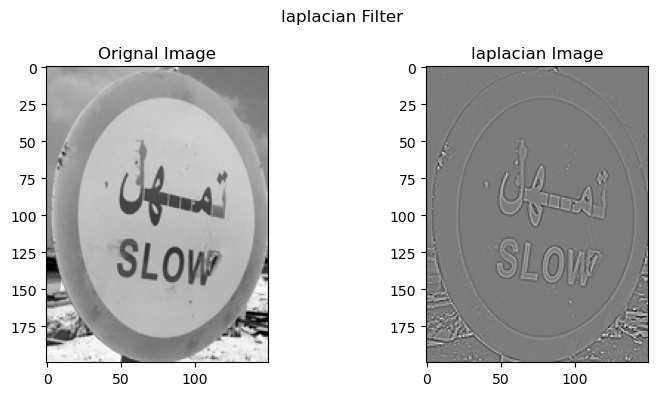

In [45]:
display_images("laplacian Filter", [resized_img_array, laplacian_image], ["Orignal Image", "laplacian Image"], rows=1, cols=2, axis=True, gray=True, figwidth=8, fighight=4)

In [46]:
# method 2 for sharpening the image
Sharper_img2 = resized_img_array - laplacian_image

#print the shape of the sharpened image
print("Sharper Image shape: ", Sharper_img2.shape)

Sharper Image shape:  (200, 150)


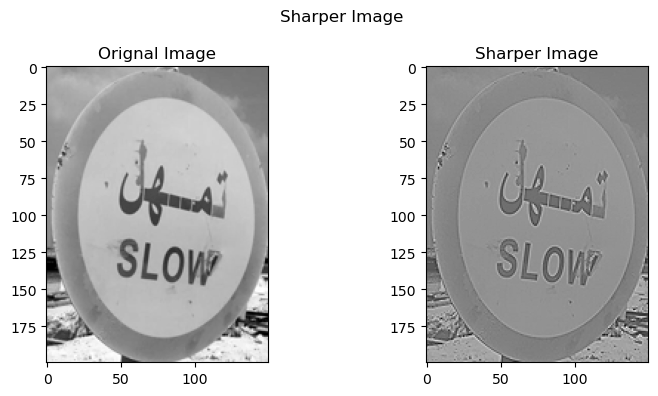

In [47]:
display_images("Sharper Image", [resized_img_array, Sharper_img2], ["Orignal Image", "Sharper Image"], rows=1, cols=2, axis=True, gray=True, figwidth=8, fighight=4)
# sharpening the image using laplacian filter shows good results

In [48]:
# import cv soble filter
from cv2 import Sobel

In [49]:
# Try Soble edge detection

# Sobel Edge Detection
sobelx = cv.Sobel(resized_img_array, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(resized_img_array, cv.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# print the shape of the gradient magnitude
print("Gradient Magnitude shape: ", gradient_magnitude.shape)

Gradient Magnitude shape:  (200, 150)


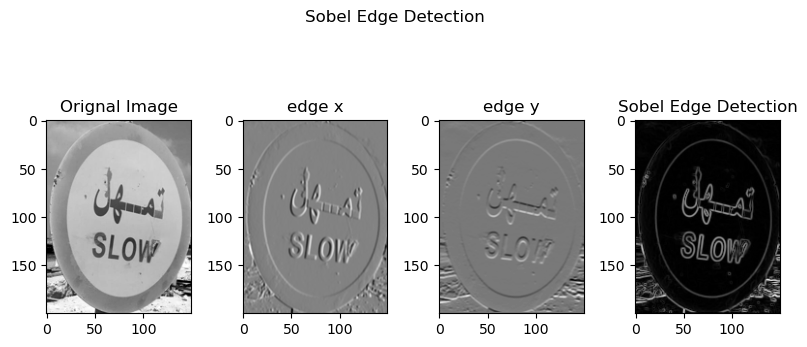

In [50]:
display_images("Sobel Edge Detection", [resized_img_array,sobelx, sobely, gradient_magnitude], ["Orignal Image", "edge x", "edge y", "Sobel Edge Detection"], rows=1, cols=4, axis=True, gray=True, figwidth=8, fighight=4)

In [51]:
# method 3 for sharpening the image

Sharper_img3 = resized_img_array + gradient_magnitude

#print the shape of the sharpened image
print("Sharper Image shape: ", Sharper_img3.shape)

Sharper Image shape:  (200, 150)


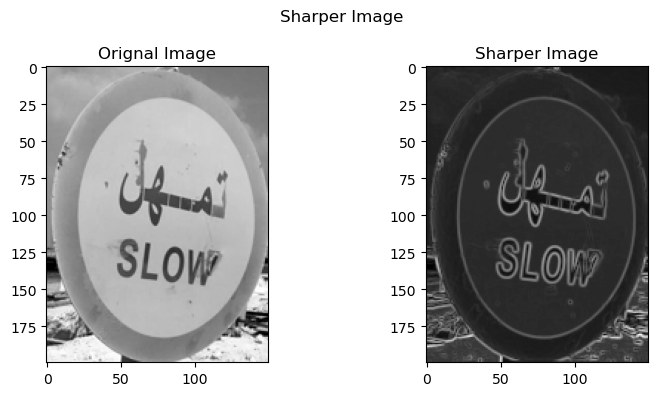

In [52]:
display_images("Sharper Image", [resized_img_array, Sharper_img3], ["Orignal Image", "Sharper Image"], rows=1, cols=2, axis=True, gray=True, figwidth=8, fighight=4)

# sharpening the image using sobel filter not shows good results

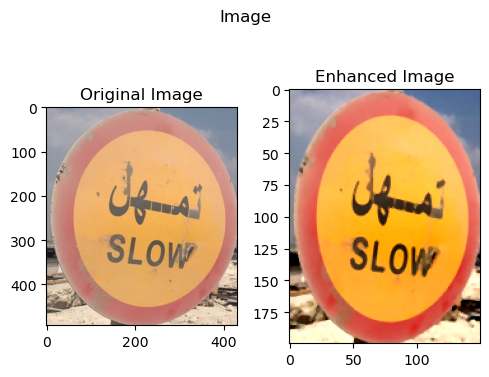

In [53]:
# method 1 to enhance the image
ksize = 3

img = Data['image'][1500]

resized_img = img.resize((nl, nc))
im_median = resized_img.filter(ImageFilter.MedianFilter(size=ksize))
contrast = ImageEnhance.Contrast(im_median)
img1 = np.array(contrast.enhance(1.8).getdata()).astype(np.uint8).reshape(nc, nl, 3)

images = [img, img1]
titles = ["Original Image", "Enhanced Image"]

display_images("Image", images, titles, axis=True, rows=1, cols=2, gray=True, figwidth=5, fighight=4)

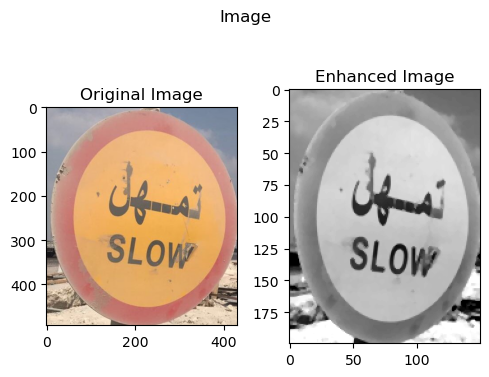

In [54]:
# method 2 to enhance the image

img = Data['image'][1500]

gray_img = img.convert('L')
resized_img = gray_img.resize((nl, nc))
im_median = resized_img.filter(ImageFilter.MedianFilter(size=ksize))
contrast = ImageEnhance.Contrast(im_median)
img1 = np.reshape(np.array(contrast.enhance(1.8).getdata()).astype(np.uint8), (resized_img.height, resized_img.width))

images = [img, img1]
titles = ["Original Image", "Enhanced Image"]

display_images("Image", images, titles, axis=True, rows=1, cols=2, gray=True, figwidth=5, fighight=4)

In [55]:
factor = 1.4
nl = 150
nc = 200
ksize = 3

Image Size:  (431, 492)


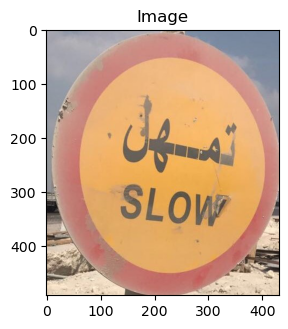

Image:  <PIL.Image.Image image mode=RGB size=431x492 at 0x1E0AC090D10>


In [56]:
img = (Data['image'][1500]).copy()

# print the size of the image
print("Image Size: ", img.size)

# print the image 
display_images("Image", [img], ["Image"], axis=True, fighight=5, figwidth=3)

# print image
print("Image: ", img)

In [57]:
# Enhance the contrast of the image
contrast = ImageEnhance.Contrast(img)
img1 = np.reshape(np.array(contrast.enhance(factor).getdata()).astype(np.uint8), (img.height, img.width, 3))

# print the size of the enhanced image
print("Enhanced Image Size: ", img1.size)
print("Enhanced Image Shape: ", img1.shape)
print("Enhanced Image: ", img1)

Enhanced Image Size:  636156
Enhanced Image Shape:  (492, 431, 3)
Enhanced Image:  [[[169 170 177]
  [169 170 177]
  [169 170 177]
  ...
  [ 93 116 148]
  [ 93 116 148]
  [ 93 116 148]]

 [[169 170 177]
  [169 170 177]
  [169 170 177]
  ...
  [ 95 117 149]
  [ 95 117 149]
  [ 95 117 149]]

 [[168 169 176]
  [168 169 176]
  [168 169 176]
  ...
  [ 95 117 149]
  [ 95 117 149]
  [ 95 117 149]]

 ...

 [[229 204 170]
  [243 218 184]
  [247 222 189]
  ...
  [245 217 182]
  [242 214 179]
  [238 210 175]]

 [[253 228 194]
  [255 235 201]
  [255 238 204]
  ...
  [242 214 179]
  [243 215 180]
  [243 215 180]]

 [[255 232 198]
  [255 232 198]
  [255 233 200]
  ...
  [235 207 172]
  [242 214 179]
  [250 222 187]]]


In [58]:
# method 3 to enhance the image

img = (Data['image'][1500]).copy()
factor = 1.4
nl = 150
nc = 200
ksize = 3

# Enhance the contrast of the image
contrast = ImageEnhance.Contrast(img)
img1 = np.reshape(np.array(contrast.enhance(factor).getdata()).astype(np.uint8), (img.height, img.width, 3))

# convert image to PIL image
img1 = Image.fromarray(img1)

# convert image to grayscale
gray_img = img1.convert('L')

# resized the image
resized_img = gray_img.resize((nl, nc), Image.BICUBIC)

# apply median filter
im_median = resized_img.filter(ImageFilter.MedianFilter(size=ksize))

# enhance the contrast of median image
contrast = ImageEnhance.Contrast(im_median)
img1 = np.reshape(np.array(contrast.enhance(1.8).getdata()).astype(np.uint8), (resized_img.height, resized_img.width))

# convert image to np array
resized_img_array = np.array(resized_img)
img1_array = np.array(img1) 

# Apply the Laplacian filter
laplacian_image = cv.Laplacian(resized_img_array, cv.CV_64F)

# sharpening the image
Sharper_img1 = resized_img_array - laplacian_image

# Apply the Laplacian filter
laplacian_image2 = cv.Laplacian(img1_array, cv.CV_64F)

# sharpening the image
Sharper_img2 = img1_array - laplacian_image

# threshold the image
thresh_img = Sharper_img2.copy()
thresh = 128
thresh_img[thresh_img > thresh] = 255
thresh_img[thresh_img <= thresh] = 0



In [59]:

images = [resized_img_array, Sharper_img1, img1_array, Sharper_img2]
titles =[ "Orignal Image", "Sharper Image", "Enhanced Image", "Sharper Image"]

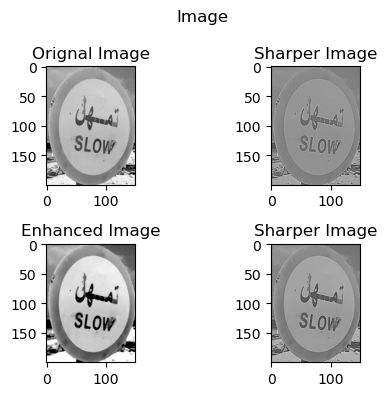

In [60]:
display_images("Image", images, titles, axis=True, rows=2, cols=2, gray=True, figwidth=5, fighight=4)

In [61]:
# sharpening the median image using laplacian filter shows good results

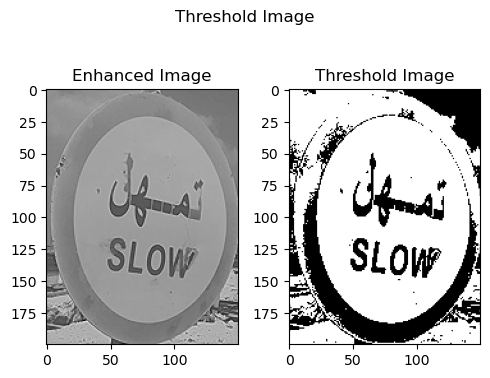

In [62]:
# display the threshold image
display_images("Threshold Image", [Sharper_img2, thresh_img], ["Enhanced Image", "Threshold Image"], axis=True, rows=1, cols=2, gray=True, figwidth=5, fighight=4)

In [63]:
# thresholding the image shows very good results

In [65]:
# Chossen method to enhance the image (method 3)

img2 = (Data['image'][500]).copy()

factor = 1.4
nl = 150
nc = 200
ksize = 3

# Enhance the contrast of the image
contrast = ImageEnhance.Contrast(img2)
img12 = np.reshape(np.array(contrast.enhance(factor).getdata()).astype(np.uint8), (img2.height, img2.width, 3))

# convert image to PIL image
img12 = Image.fromarray(img12)
# convert image to grayscale
gray_img2 = img12.convert('L')

# resized the image
resized_img2 = gray_img2.resize((nl, nc), Image.BICUBIC)

# apply median filter
im_median2 = resized_img2.filter(ImageFilter.MedianFilter(size=ksize))
# enhance the contrast of median image
contrast = ImageEnhance.Contrast(im_median2)
img122 = np.reshape(np.array(contrast.enhance(1.8).getdata()).astype(np.uint8), (im_median2.height, im_median2.width))

# convert image to np array
# img1_array2 = np.array(img122) 
# Apply the Laplacian filter
laplacian_image22 = cv.Laplacian(img122, cv.CV_64F)

# sharpening the image
Sharper_img22 = img122 - laplacian_image22

# threshold the image
thresh_img2 = Sharper_img22.copy()
thresh = 128
thresh_img2[thresh_img2> thresh] = 255
thresh_img2[thresh_img2 <= thresh] = 0

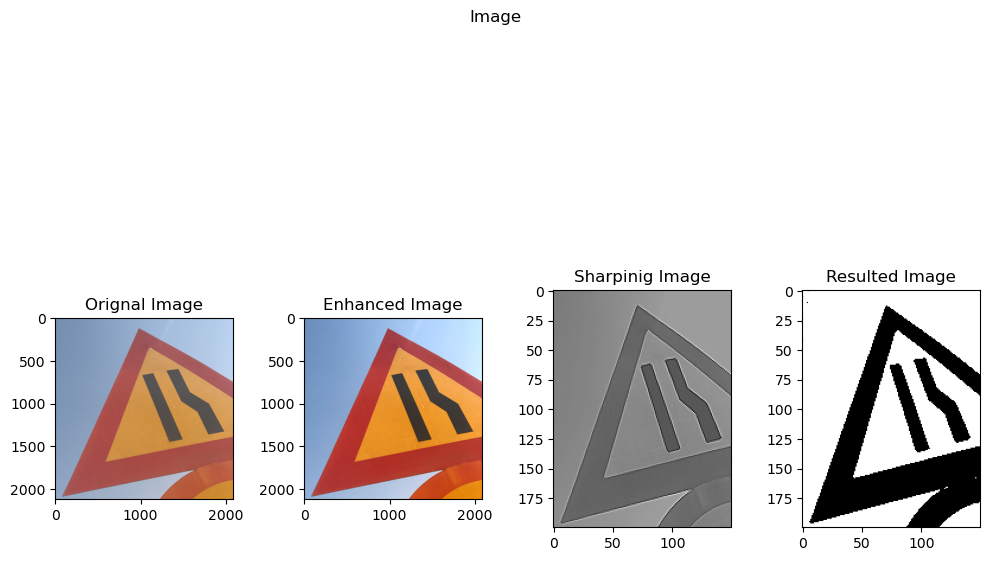

In [66]:
# display the resulted image
display_images("Image", [img2, img12,Sharper_img22, thresh_img2], ["Orignal Image", "Enhanced Image", "Sharpinig Image", "Resulted Image"], axis=True, rows=1, cols=4, gray=True, figwidth=10, fighight=8)

In [67]:
print(Data['image'][0])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x398 at 0x1E0A279A3D0>


In [15]:
factor = 1.4
nl = 150
nc = 200
ksize = 3

for i, image in enumerate(Data['image']):
    # Enhance the contrast of the image
    contrast1 = ImageEnhance.Contrast(image)
    contrasted_image1_array = np.reshape(np.array(contrast1.enhance(factor).getdata()).astype(np.uint8), (image.height, image.width, 3))

    # convert image to PIL image
    contrasted_image1_PIL = Image.fromarray(contrasted_image1_array)
    # convert image to grayscale
    gray_image= contrasted_image1_PIL.convert('L')

    # resized the image
    resized_image = gray_image.resize((nl, nc), Image.BICUBIC)

    # apply median filter
    Median_image = resized_image.filter(ImageFilter.MedianFilter(size=ksize))
    # enhance the contrast of median image
    contrast2 = ImageEnhance.Contrast(Median_image)
    contrasted_image2_array = np.reshape(np.array(contrast2.enhance(1.8).getdata()).astype(np.uint8), (Median_image.height, Median_image.width))

    '''# Apply the Laplacian filter
    laplacian_image22 = cv.Laplacian(contrasted_image2_array, cv.CV_64F)

    # sharpening the image
    Sharper_img22 = contrasted_image2_array - laplacian_image22

    # threshold the image
    thresh_img2 = Sharper_img22.copy()
    thresh = 128
    thresh_img2[thresh_img2> thresh] = 255
    thresh_img2[thresh_img2 <= thresh] = 0'''
    
    Data['image'][i] = contrasted_image2_array


In [69]:
print(len(Data))

2718


In [70]:
print(Data['image'][0].shape)
print(Data['image'][0])

(200, 150)
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [75]:
image4321 = np.array((Data['image'][0]).copy().tolist()).reshape(-1)

# print(len(image4321))
print(image4321.shape)
print(image4321)

(30000,)
[255. 255. 255. ... 255. 255. 255.]


In [ ]:

'''
# convert the image data to a NumPy array
image = Data['image'][5].tolist()
print(len(image))

# print or display the image
print(image)
'''

"\n# convert the image data to a NumPy array\nimage = Data['image'][5].tolist()\nprint(len(image))\n\n# print or display the image\nprint(image)\n"

In [77]:
'''# address x
x = np.array(Data['image'].tolist())

# print the shape of x
print(x.shape)'''

(2718, 200, 150)


In [16]:
# reshape Data list images ti 1D array and assign them to x as an nparray (x is the input data)

x = np.array([np.array(image).reshape(-1) for image in Data['image']])
print(x.shape)

(2718, 30000)


In [17]:
# address y
y = np.array(Data['label'])

# print the shape of y
print(y.shape)

(2718,)


In [18]:
# check if there is a nan value in x
print(np.isnan(x).any())

#print nan values if exists
print(np.argwhere(np.isnan(x)))


False
[]


In [19]:

# check if there is a nan value in y
print(np.isnan(y).any())

# print nan values if exists
print(np.argwhere(np.isnan(y)))

# print the number of nan values in y
print(np.isnan(y).sum())

False
[]
0


In [20]:
# convert numpy arrays to pandas dataframe
Images_pixles = pd.DataFrame(x)
Images_labels = pd.DataFrame(y)
preprocessed_data = pd.concat([Images_pixles, Images_labels], axis=1)

# save the Data in csv file
preprocessed_data.to_csv("preprocessed_data3.csv", index=False)
